<a href="https://colab.research.google.com/github/2001aya2001alaa/Image-Processing-Graduation-Project/blob/main/Dogs%20CLassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import image
import os
import cv2

from sklearn.model_selection import train_test_split

import imgaug as ia
import imgaug.augmenters as iaa

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#!kaggle datasets download -d mohamedchahed/dog-breeds

In [3]:
#! unzip /content/dog-breeds.zip -d DogsData

images list => Hold the data  
Classes list => Hold the label of the data

In [4]:
classes = []
images = []

In [5]:
files = os.listdir('/content/DogsData/dog-breeds')
len(files)

8

In [6]:
hflip= iaa.Fliplr(p=1.0)
rot1 = iaa.Affine(rotate=(-120,30))
crop1 = iaa.Crop(percent=(0.2))
noise = iaa.AdditiveGaussianNoise(10,30)
contrast=iaa.GammaContrast((0.5, 2.0))
contrast_lin = iaa.LinearContrast((0.6, 0.4))
contrast_sig = iaa.SigmoidContrast(gain=(5, 10), cutoff=(0.4, 0.6))
elastic = iaa.ElasticTransformation(alpha=50.0, sigma=4.5)

# **Load The Data**

In [7]:
pth = '/content/DogsData/dog-breeds'
files = os.listdir(pth)

i = 0

for file in files:
    print(file)
    print(i)
    img_path = os.path.join(pth, file)
    file_list2 = os.listdir(img_path)
    for img in file_list2:
        img_path = img_path+'/'+img

        img_obj = cv2.imread(img_path)

        if img_obj is not None and img_obj.shape != ():
            img_obj = cv2.cvtColor(img_obj, cv2.COLOR_BGR2RGB)
            img_obj = cv2.resize(img_obj, (256, 256))
            images.append(img_obj)
            classes.append(i)

            images.append(hflip.augment_image(img_obj))
            classes.append(i)

            images.append(rot1.augment_image(img_obj))
            classes.append(i)

            images.append(crop1.augment_image(img_obj))
            classes.append(i)

            images.append(noise.augment_image(img_obj))
            classes.append(i)

            images.append(contrast_sig.augment_image(img_obj))
            classes.append(i)

            images.append(elastic.augment_image(img_obj))
            classes.append(i)
            img_path = os.path.join(pth, file)
    i = i + 1

labrador-retriever
0
poodle
1
bulldog
2
husky
3
dalmatian
4
beagle
5
german-shepherd
6
rottweiler
7


In [8]:
len(images)

3787

In [9]:
images[0].shape

(256, 256, 3)

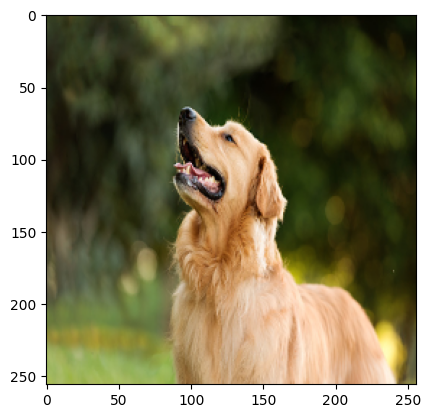

In [10]:
plt.imshow(images[14])

# **Split The Data**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images), np.array(classes), test_size = 0.2, random_state = 42)

In [12]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

3029
758
3029
758


In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3029, 256, 256, 3)
(3029,)
(758, 256, 256, 3)
(758,)


# **The Model Architecture**

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu" , input_shape = (256,256, 3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1200,activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1200,activation ="relu"),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(8,activation = "softmax")
])

# **Train The Model**

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

y_train = tf.keras.utils.to_categorical(y_train, 8)
y_test = tf.keras.utils.to_categorical(y_test, 8)

model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
95/95 [==============================] - 732s 8s/step - loss: 26.5072 - accuracy: 0.4081
Epoch 2/10
95/95 [==============================] - 734s 8s/step - loss: 0.7231 - accuracy: 0.7900
Epoch 3/10
95/95 [==============================] - 742s 8s/step - loss: 0.2784 - accuracy: 0.9237
Epoch 4/10
95/95 [==============================] - 754s 8s/step - loss: 0.1644 - accuracy: 0.9525
Epoch 5/10
95/95 [==============================] - 738s 8s/step - loss: 0.0892 - accuracy: 0.9742
Epoch 6/10
95/95 [==============================] - 741s 8s/step - loss: 0.0564 - accuracy: 0.9851
Epoch 7/10
95/95 [==============================] - 734s 8s/step - loss: 0.0962 - accuracy: 0.9799
Epoch 8/10
95/95 [==============================] - 740s 8s/step - loss: 0.1694 - accuracy: 0.9647
Epoch 9/10
95/95 [==============================] - 737s 8s/step - loss: 0.1517 - accuracy: 0.9650
Epoch 10/10
95/95 [==============================] - 739s 8s/step - loss: 0.1484 - accuracy: 0.9693


# **Evaluate The Model**

In [16]:
loss, acc = model.evaluate(x_test, y_test)
print("Loss value = ", loss)
print("The accuracy = ", acc*100, "%")

24/24 [==============================] - 36s 1s/step - loss: 1.3779 - accuracy: 0.8061
Loss value =  1.377943754196167
The accuracy =  80.60685992240906 %


# **Save The Model**

In [17]:
import pickle

with open('model_2.pkl', 'wb') as f:
    pickle.dump(model, f)

In [18]:
model.save('model_2.h5')

In [30]:
#model.save_weights('my_model_weights.h5')

In [22]:
from tensorflow.keras.models import load_model

# Load the saved model from a file
loaded_model = load_model('model_2.h5')

In [23]:
loss, acc = loaded_model.evaluate(x_test, y_test)
print("Loss value = ", loss)
print("The accuracy = ", acc*100, "%")

24/24 [==============================] - 35s 1s/step - loss: 1.3779 - accuracy: 0.8061
Loss value =  1.377943754196167
The accuracy =  80.60685992240906 %


In [31]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [32]:
print(os.getcwd())

/content


*Used To Load The data from Kaggle*

In [ ]:
#! mkdir ~/.kaggle

In [ ]:
#! cp /content/sample_data/kaggle.json ~/.kaggle/

In [ ]:
#! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!pip install -q kaggle # installing the kaggle package

In [ ]:
#!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed

In [ ]:
#!cp ~/.kaggle/kaggle.json ~/.kaggle/ # move the key to the folder

In [ ]:
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets download -d zippyz/cats-and-dogs-breeds-classification-oxford-dataset

In [ ]:
#! unzip /content/Dataset.zip -d Dataset